In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import arange, array

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, SelectFromModel
from sklearn.feature_selection import f_regression, mutual_info_regression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet, Lasso, Ridge, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [96]:
housing = pd.read_csv('data/houseprice_clean.csv')
housing.shape

(2580, 80)

In [3]:
housing.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [97]:
price = housing['SalePrice']
features = housing.drop(["SalePrice"], axis=1)
log_price = np.log(housing.SalePrice)

## Scale Features

In [98]:
num_features = features.select_dtypes(include=['int64','float64'])
cat_features = features.select_dtypes(include=['object'])

In [99]:
# Scaling

# do I train the scaler on the train set only, or can I do on the whole set?
# is it important to scale train/test separately? (see scratch for example)

scaler = StandardScaler()
num_feat_scaled = pd.DataFrame(scaler.fit_transform(num_features), columns = num_features.columns)
features_scaled = pd.concat([num_feat_scaled, cat_features], axis = 1)
features_scaled = pd.get_dummies(features_scaled, drop_first=True)

In [100]:
features_scaled.shape

(2580, 282)

In [7]:
# confirm only numerical features are standardized
features_scaled.head()

,GrLivArea,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSewr,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,...,BsmtQual_None,BsmtQual_Po,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_None,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Po,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,PoolQC_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.289598,-0.647100,-0.298749,-0.274468,-0.033733,0.339988,-1.053847,-1.647539,-0.562750,-0.480304,-0.305221,0.186062,-0.430387,-0.768784,-0.794405,-0.095609,1.089555,-0.25377,-1.009265,-0.757892,-1.033650,-0.199051,-1.555298,0.610254,-1.397394,0.341856,-0.327115,-0.743408,-0.697756,-0.362184,-0.099302,2.636678,-0.054791,-0.097731,-1.180008,1.647483,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,-0.894555,1.456008,-0.663099,-0.724294,-0.765088,-0.551444,0.460593,0.012109,0.286195,0.251192,1.948743,-1.022874,0.030354,-0.255331,-0.794405,-0.095609,1.089555,-0.25377,0.823179,-0.757892,-1.033650,-0.199051,-0.903785,-0.931817,0.333582,-1.012439,-0.968399,-0.743408,0.892001,-0.362184,-0.

## Feature Importance

In [39]:
# adapted from https://machinelearningmastery.com/feature-selection-for-regression-data/

In [55]:
X = features_scaled
y = price
log_y = log_price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

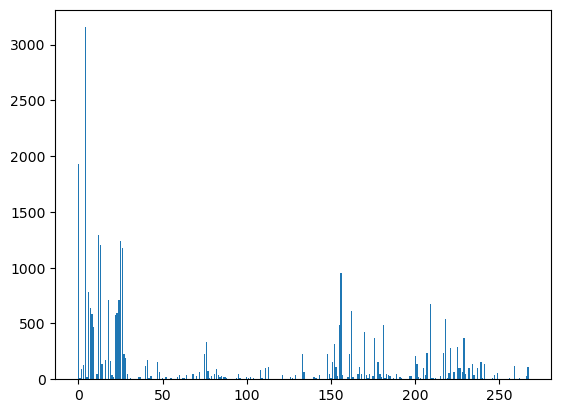

In [56]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=f_regression, k='all')
 
    # learn relationship from training data
    fs.fit(X_train, y_train)
 
    # transform train and test data
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# plot the scores
fig, ax = plt.subplots()
ax.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [57]:
selected_features = list(X.columns[fs.get_support()]) # all features
scores = fs.scores_
feature_imp = pd.DataFrame(scores, index=selected_features)
feature_imp.columns = ['imp']
feature_imp.sort_values('imp', ascending = False).head(10)

,imp
OverallQual,3154.760838
GrLivArea,1932.523438
TotalBsmtSF,1288.978111
GarageCars,1240.461648
1stFlrSF,1203.705055
GarageArea,1172.603032
ExterQual_TA,955.813014
YearBuilt,777.980438
GarageYrBlt,714.207097
FullBath,707.684334


In [58]:
feature_imp[feature_imp['imp'] == 0] # 7 columns

,imp
Neighborhood_Landmrk,0.0
Condition2_RRAn,0.0
RoofMatl_Membran,0.0
RoofMatl_Metal,0.0
Electrical_None,0.0
Functional_Sal,0.0
SaleType_VWD,0.0


In [59]:
sel_fregression = list(feature_imp[feature_imp['imp'] != 0].index)
feat_fregression = features_scaled[sel_fregression]
feat_fregression.shape

(2580, 261)

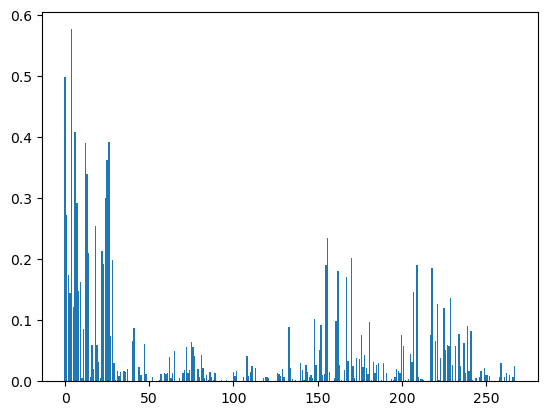

In [60]:
# same as above, with with 'mutual info regression'

def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
 
    # learn relationship from training data
    fs.fit(X_train, y_train)
 
    # transform train and test data
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# plot the scores
fig, ax = plt.subplots()
ax.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [61]:
# top 10 features vary slightly from above
# magnitude of 'scores' are very different

selected_features = list(X.columns[fs.get_support()])
scores = fs.scores_
feature_imp = pd.DataFrame(scores, index=selected_features)
feature_imp.columns = ['imp']
feature_imp.sort_values('imp', ascending = False).head(10)

,imp
OverallQual,0.576433
GrLivArea,0.497817
YearBuilt,0.407454
GarageArea,0.392379
TotalBsmtSF,0.390729
GarageCars,0.362311
1stFlrSF,0.340131
GarageYrBlt,0.299713
YearRemodAdd,0.291514
MSSubClass,0.271531


In [62]:
feature_imp[feature_imp['imp'] == 0]
feature_imp[feature_imp['imp'] == 0].shape # 57 columns

(57, 1)

In [63]:
sel_mutualreg = list(feature_imp[feature_imp['imp'] != 0].index)
feat_mutualreg = features_scaled[sel_mutualreg]
feat_mutualreg.shape

(2580, 211)

In [126]:
# from https://towardsdatascience.com/feature-selection-using-regularisation-a3678b71e499

sel_ = SelectFromModel(Lasso(alpha = 208.9))
sel_.fit(X_train, y_train)

selected_feat = X.columns[(sel_.get_support())]
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

total features: 268
selected features: 77
features with coefficients shrank to zero: 191


In [129]:
feat_lassoreg = features_scaled[selected_feat]
feat_lassoreg.shape

(2580, 77)

In [101]:
# new features

housing_newfeat = pd.read_csv('data/houseprice_newfeat.csv')

price = housing['SalePrice']
features_new = housing_newfeat.drop(["SalePrice"], axis=1)

num_features = features_new.select_dtypes(include=['int64','float64'])
cat_features = features_new.select_dtypes(include=['object'])

scaler = StandardScaler()
num_feat_scaled = pd.DataFrame(scaler.fit_transform(num_features), columns = num_features.columns)
new_features_scaled = pd.concat([num_feat_scaled, cat_features], axis = 1)
new_features_scaled = pd.get_dummies(features_scaled, drop_first=True)

In [102]:
# after removing outliers

housing_trimmed = pd.read_csv('data/houseprice_trimmed.csv')

price = housing['SalePrice']
features_new = housing_trimmed.drop(["SalePrice"], axis=1)

num_features = housing_trimmed.select_dtypes(include=['int64','float64'])
cat_features = housing_trimmed.select_dtypes(include=['object'])

scaler = StandardScaler()
num_feat_scaled = pd.DataFrame(scaler.fit_transform(num_features), columns = num_features.columns)
trimmed_scaled = pd.concat([num_feat_scaled, cat_features], axis = 1)
trimmed_scaled = pd.get_dummies(features_scaled, drop_first=True)

In [149]:
## backward selection

from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SequentialFeatureSelector

X = new_features_scaled
y = price

sfs = SequentialFeatureSelector(Ridge(),
                                n_features_to_select=260,
                                direction='backward',
                                scoring='r2',
                                cv=None)
sfs.fit(X, y)

In [153]:
backwards_selection = sfs.transform(X)
backwards_selection.shape

(2580, 260)

In [156]:
## RFECV

from sklearn.feature_selection import RFECV

sel = RFECV(Ridge())
sel = sel.fit(X, y)

In [159]:
RFECV_sel = sel.transform(X)
RFECV_sel.shape

(2580, 211)

In [110]:
ridge = Ridge()
x = features_scaled
y = price

cv = KFold(n_splits=3, shuffle = True, random_state = 0)
baseline = np.mean(cross_val_score(ridge, x, y, scoring='r2', cv=cv))

In [111]:
baseline

0.9053518916109606

In [ ]:
interactions = list()
for feature_A in features_scaled.columns:
    for feature_B in features_scaled.columns:
        if feature_A > feature_B:
            features_scaled['interaction'] = features_scaled[feature_A] * features_scaled[feature_B]
            score = np.mean(cross_val_score(ridge, x, y, scoring='r2', cv=cv, n_jobs=1))
            if score > baseline:
                interactions.append((feature_A, feature_B, round(score,3)))

print('Baseline R2: %.3f' % baseline)
#print('Top 10 interactions: %s' % sorted(interactions, key=lambda(x):x[2],reverse=True)[:10])

## Pipeline

In [86]:
ridge = Ridge()

pipeline = Pipeline([
     ('selector',SelectKBest(f_regression)),
     ('model',Ridge())])

In [87]:
# this is the strongest one yet

params1 = {
    'selector__k': arange(150, 265, 5),
    'model__alpha': arange(10, 12, 1)
}
# with log y: returns alpha:11, k: 260, R^2: .9306

params2 = {
    'selector__k': arange(255, 268, 1),
    'model__alpha': arange(10, 12, .1)
}
# with log y: returns alpha:11.1, k: 262, R^2: .9306
# with y: alpha 11.9, k: 255, R^2 .9237

cv = KFold(n_splits=10, shuffle = True, random_state = 0)
gs = GridSearchCV(pipeline, params2, scoring='r2', cv=cv)
gs.fit(X_train, y_train)

print("The best parameters are: ", gs.best_params_)
print("R^2 of the final model: ", gs.score(X_test, y_test))

The best parameters are:  {'model__alpha': 11.099999999999996, 'selector__k': 262}
R^2 of the final model:  0.9306058167156752


In [67]:
# print removed features (6)
X.columns[~gs.best_estimator_.named_steps['selector'].get_support()]

Index(['Neighborhood_Landmrk', 'Neighborhood_Mitchel', 'Condition2_RRAe',
       'RoofMatl_Membran', 'RoofMatl_Roll', 'Electrical_None'],
      dtype='object')

In [91]:
cols = X.columns[gs.best_estimator_.named_steps['selector'].get_support()]
coefs = gs.best_estimator_.named_steps['model'].coef_

coefs = pd.DataFrame(coefs, index=cols)
coefs.columns = ['coef']
coefs.sort_values(by = 'coef', ascending = False)

,coef
SaleCondition_Normal,0.094204
Neighborhood_Crawfor,0.089997
OverallQual,0.078651
Exterior1st_BrkFace,0.074669
Condition2_Norm,0.074495
...,...
Functional_Maj2,-0.063303
BldgType_Twnhs,-0.064283
Neighborhood_MeadowV,-0.068599
MSZoning_C (all),-0.086593


## Ridge Regression

In [9]:
X = features_scaled
y = price
log_y = log_price

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

ridge = Ridge()
ridge.fit(X_train, y_train)

cv = KFold(n_splits=5, shuffle = True, random_state = 0)
scores = cross_val_score(ridge, X_test, y_test, cv=cv, scoring="r2")

print(scores)
print(f"Average R-squared score: {scores.mean()}")

[0.90957279 0.91462813 0.83667014 0.9184576  0.9036051 ]
Average R-squared score: 0.896586751882641


In [28]:
# try RandomSearch instead

params1 = {"alpha": [0.0001, 0.01, 1, 100, 10000, 1000000]} # 1
params2 = {"alpha": arange(0, 100, 1)} # 8
params3 = {"alpha": arange(7, 9, .1)} # 7.9

ridge = Ridge()
cv = KFold(n_splits=5, shuffle = True, random_state = 0)
gs = GridSearchCV(ridge, params3, scoring='r2', cv=cv)
gs.fit(X_train, y_train)

scores = cross_val_score(gs.best_estimator_, X_test, y_test, cv=cv, scoring="r2")

print(gs.best_params_)
print(scores.mean())

{'alpha': 7.899999999999997}
0.9087659298269678


In [31]:
ridge = Ridge(alpha = 7.9)
cv = KFold(n_splits=5, shuffle = True, random_state = 0)

ridge.fit(X_train, y_train)

scores = cross_val_score(ridge, X_test, y_test, cv=cv, scoring="r2")
scores.mean()

0.9087659298269678

In [36]:
ridge.coef_ == 0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False,

In [23]:
alphas_ridge = arange(0, 15)
coefs_ridge = []
scores_ridge = []

for alpha in alphas_ridge:
    ridge.set_params(alpha=alpha)
    ridge.fit(X_train, y_train)
    coefs_ridge.append(ridge.coef_)
    scores_ridge.append(ridge.score(X_test, y_test))
coefs_ridge = pd.DataFrame(coefs_ridge, index=alphas_ridge, columns=X_train.columns)
coefs_ridge.head()

,GrLivArea,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSewr,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,...,BsmtQual_None,BsmtQual_Po,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_None,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Po,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,PoolQC_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.530051e+18,-2311.092457,-6019.097021,7494.135443,9505.650847,6898.376653,11601.165588,-118.616275,6029.419579,1.218573e+18,4.949702e+17,1.206961e+18,-1.189143e+18,1.177195e+18,1.327847e+18,1.390357e+17,3245.202289,203.209190,-254.187514,-582.747381,-3860.783589,-2098.501442,914.451348,6748.479866,-1485.772667,4152.541270,2525.899953,1647.964163,-504.782085,1700.989123,-100.167270,2754.261625,-8046.907710,481.488795,-321.412006,-375.693495,2.690764e+17,2.690764e+17,-1.132231e+18,2.690764e+17,2.690764e+17,2.690764e+17,13455.685382,542.354213,-3762.366455,275.793943,-4164.976772,617.999864,5032.566219,-3324.633062,6460.059362,1.401307e+18,1587.295395,-5158.923533,-13225.200367,-1422.215016,5611.311196,-26381.802258,2657.020769,5840.076045,-904.580531,-8388.024388,-9017.198623,4412.176827,-19856.552722,-8804.603629,5382.707798,70168.180039,-9118.777033,9.618760e+17,2654.075394,-16034.527045,-17154.822732,18223.390350,-14608.886891,22374.365664,13940.068128,-16391.

Text(0, 0.5, 'slope values')

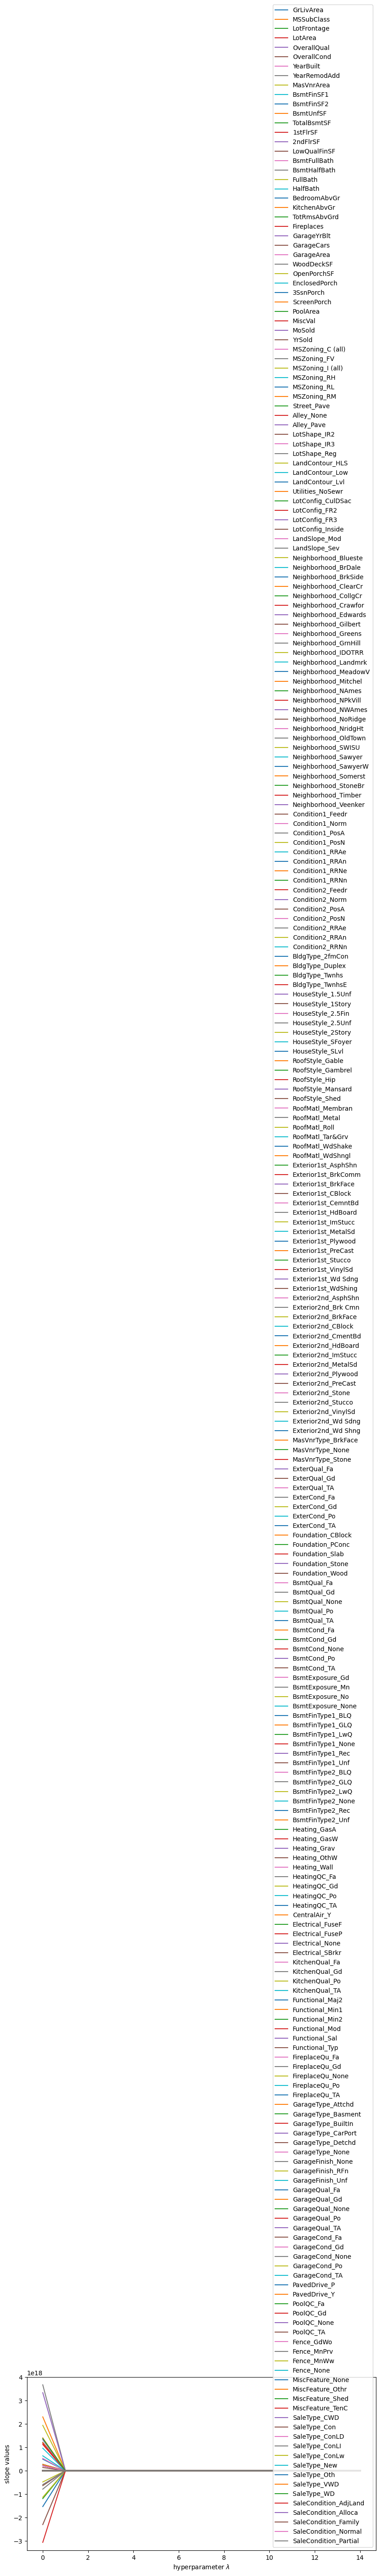

In [45]:
# why is the grid search returning 8 as the optimum alpha?
# why are all coefficients going to 0?
# why is R^2 increasing instead of decreasing?

plt.rcParams['figure.figsize'] = (10,5)
for name in coefs_ridge.columns:
    plt.plot(coefs_ridge.index, coefs_ridge[name], label=name)
plt.legend(loc=4)   
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')

#plt.ylim((-3,3))

Text(0, 0.5, '$R^2$')

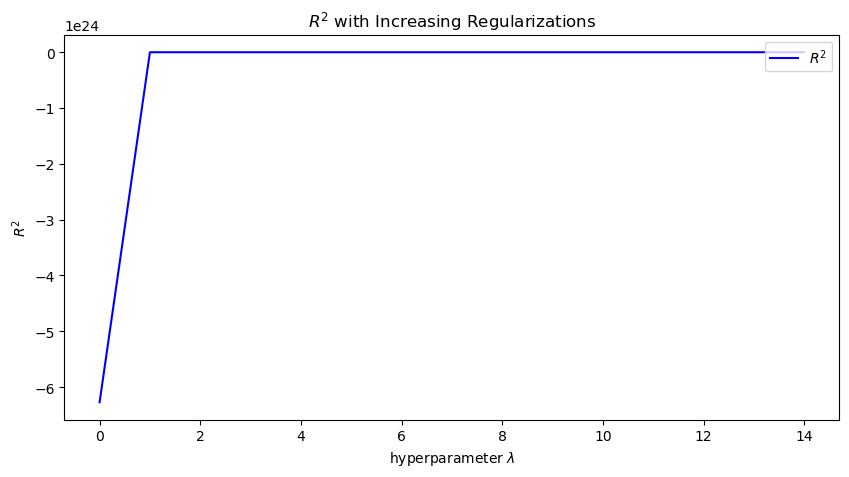

In [46]:
plt.plot(alphas_ridge, scores_ridge, c="b", label=r"$R^2$")
plt.legend(loc=1)
plt.title(r"$R^2$ with Increasing Regularizations")
plt.xlabel(r"hyperparameter $\lambda$")
plt.ylabel(r"$R^2$")

## Lasso Regression

In [47]:
X = features_scaled
y = price
log_y = log_price

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

lasso = Lasso()
lasso.fit(X_train, y_train)

cv = KFold(n_splits=5, shuffle = True, random_state = 0)
scores = cross_val_score(lasso, X_test, y_test, cv=cv, scoring="r2")

print(scores)
print(f"Average R-squared score: {scores.mean()}")

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.599e+10, tolerance: 9.449e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.425e+10, tolerance: 3.762e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

[0.88394925 0.87554149 0.81268593 0.87401407 0.85894011]
Average R-squared score: 0.8610261714248673


/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.935e+10, tolerance: 3.885e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.140e+10, tolerance: 4.172e+08
  model = cd_fast.enet_coordinate_descent(


In [54]:
params1 = {"alpha": [0.0001, 0.01, 1, 100, 10000, 1000000]} # 100
params2 = {"alpha": arange(1, 10000, 100)} # 201
params3 = {"alpha": arange(100, 300, 10)} # 220
params4 = {"alpha": arange(210, 230, 1)} # 217
params5 = {"alpha": arange(216, 218, .1)}

lasso = Lasso()
cv = KFold(n_splits=5, shuffle = True, random_state = 0)
gs = GridSearchCV(lasso, params5, scoring='r2', cv=cv)
gs.fit(X_train, y_train)

scores = cross_val_score(gs.best_estimator_, X_test, y_test, cv=cv, scoring="r2")

print(gs.best_params_)
print(scores.mean())

{'alpha': 216.69999999999996}
0.9092681794173505


In [60]:
lasso = Lasso(alpha = 216.7)
cv = KFold(n_splits=5, shuffle = True, random_state = 0)

lasso.fit(X_train, y_train)

scores = cross_val_score(lasso, X_test, y_test, cv=cv, scoring="r2")
scores.mean()

0.9092681794173505

In [66]:
coefs_lasso = pd.DataFrame(lasso.coef_, index = X_train.columns, columns = ['coef'])
coefs_lasso.head()

,coef
GrLivArea,26142.903228
MSSubClass,-4672.649072
LotFrontage,-1470.459365
LotArea,4457.779746
OverallQual,14253.002994


In [70]:
coefs_lasso[coefs_lasso['coef'] == 0].shape # 192 0s

(192, 1)

In [71]:
alphas = arange(0, 250)
coefs_lasso = []

for alpha in alphas:
    lasso.set_params(alpha=alpha)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)

coefs_lasso = pd.DataFrame(coefs_lasso, index=alphas, columns=X_train.columns)
coefs_lasso.head()

/var/folders/br/94g31g292jj5vykvq71cy53m0000gn/T/ipykernel_41380/4097729128.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train, y_train)
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.924e+11, tolerance: 9.449e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
 

,GrLivArea,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSewr,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,...,BsmtQual_None,BsmtQual_Po,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_None,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Po,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,PoolQC_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,41016.344643,-1355.329239,-2334.101978,6384.023248,8452.897675,6435.180567,10133.532823,821.784470,4881.713185,12327.307447,5288.846635,4470.671001,2858.351217,-11277.261497,-8296.132154,-1731.190714,995.449350,280.544222,380.369739,104.543329,-3645.943457,-2386.128318,1183.136856,6554.245236,-1100.026148,3635.516573,2813.649765,1073.524042,-237.919652,1067.320786,51.291696,2355.302883,-8191.714008,472.203690,-715.677459,-535.159733,-8358.356977,-9586.543547,-15172.168629,8451.394023,4879.667128,-1434.899021,9722.457384,1316.982437,-876.178955,398.635471,-3559.902158,706.809405,5800.966790,-2333.869583,6545.889322,12391.914088,2334.183311,-5143.239611,-14229.143612,-1242.351977,5703.583162,-27349.057534,6843.041685,4399.337816,-1300.890908,-7125.636733,-9141.892917,5658.802132,-19071.377618,-8013.132960,9663.684118,71607.237878,-9403.191778,0.0,2054.501924,-16126.572791,-16252.634490,17328.511074,-15318.056986,21356.032345,13674.503169,-16485.265906,-21580.968256

Text(0, 0.5, 'slope values')

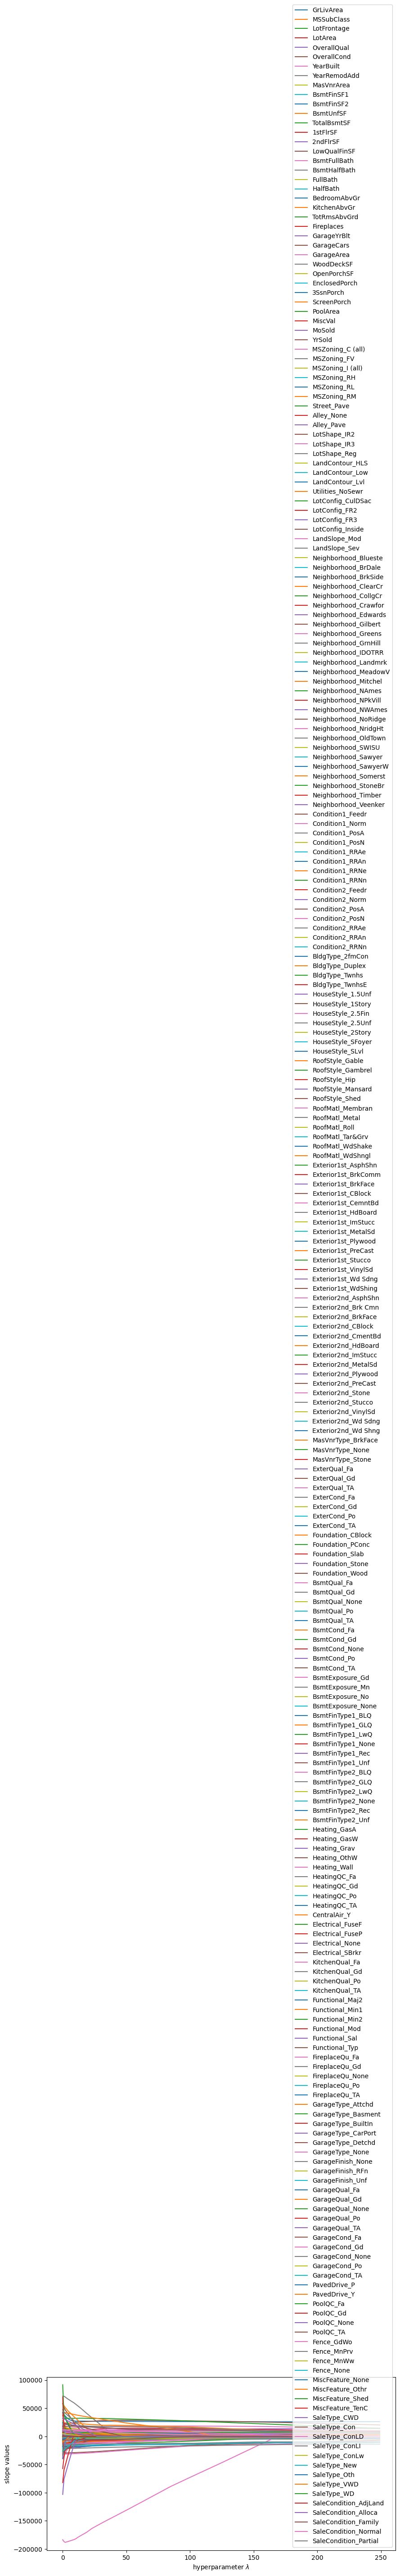

In [74]:
plt.rcParams["figure.figsize"] = (10, 5)
for name in coefs_lasso.columns:
    plt.plot(coefs_lasso.index, coefs_lasso[name], label=name)
plt.legend(loc=4)
plt.xlabel(r"hyperparameter $\lambda$")
plt.ylabel(r"slope values")

# plt.xlim((150, 250)) # zoom in to see coefficients go towards 0

## ElasticNet

In [90]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, shuffle=True)

elasticnet = ElasticNet()
elasticnet.fit(X_train, y_train)

# print(r'The R^2 is %.2f' %(elasticnet.score(house_features, prices)))
# elasticnet.coef_,  elasticnet.intercept_

cv = KFold(n_splits=10, shuffle = True, random_state = 0)
scores = cross_val_score(elasticnet, X_test, y_test, cv=cv, scoring="r2")

print(f"Average R-squared score: {scores.mean()}")

Average R-squared score: 0.8877643885408822


In [ ]:
# adapted from https://alfurka.github.io/2018-11-18-grid-search/

In [ ]:
def test(models, data, iterations = 100):
    results = {}
    for i in models:
        r2_train = []
        r2_test = []
        for j in range(iterations):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)
            r2_test.append(r2_score(y_test, models[i].fit(X_train, y_train).predict(X_test)))
            r2_train.append(r2_score(y_train, models[i].fit(X_train, y_train).predict(X_train)))
        results[i] = [np.mean(r2_train), np.mean(r2_test)]
    return pd.DataFrame(results)

In [ ]:
# grid search for multiple models

lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}
ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}

models2 = {'OLS': linear_model.LinearRegression(),
           'Lasso': GridSearchCV(linear_model.Lasso(), 
                               param_grid=lasso_params).fit(df[X], df[Y]).best_estimator_,
           'Ridge': GridSearchCV(linear_model.Ridge(), 
                               param_grid=ridge_params).fit(df[X], df[Y]).best_estimator_,}

In [ ]:
# grid search with multiple pipelines

lasso_params = {'fit__alpha':[0.005, 0.02, 0.03, 0.05, 0.06]}
ridge_params = {'fit__alpha':[550, 580, 600, 620, 650]}

pipe1 = Pipeline([('poly', PolynomialFeatures()),
                 ('fit', linear_model.LinearRegression())])
pipe2 = Pipeline([('poly', PolynomialFeatures()),
                 ('fit', linear_model.Lasso())])
pipe3 = Pipeline([('poly', PolynomialFeatures()),
                 ('fit', linear_model.Ridge())])

models3 = {'OLS': pipe1,
           'Lasso': GridSearchCV(pipe2, 
                                 param_grid=lasso_params).fit(df[X], df[Y]).best_estimator_ ,
           'Ridge': GridSearchCV(pipe3, 
                                 param_grid=ridge_params).fit(df[X], df[Y]).best_estimator_,}

In [ ]:
test(models3)

In [ ]:
# feature selection 
# option 1: remove vars with 0 feature importance (f_regression)
# option 2: remove vars with 0 featuer importance (mutual_info_regression)
# option 3: SelectFromModel(Lasso)

## Testing Feature Sets

In [ ]:
# adapted from Vivian

In [160]:
feature_sets_1 = {
    "all features, scaled and dummified": features_scaled, # 268 total
    "SelectKBest f_regression": feat_fregression, # top 261
    "SelectKBest mutual_info": feat_mutualreg, # top 211
    "SelectFromModel Lasso": feat_lassoreg, # 77 features
    "New features": new_features_scaled,
    "Backwards selection": backwards_selection,
    "RFECV": RFECV_sel
}

# best is Ridge with RFECV
# test_r2_score = 0.9192

In [103]:
feature_sets_2 = {
    "All features, scaled and dummified": features_scaled, # 268 total
    "All new features": new_features_scaled,
    "Outliers removed": trimmed_scaled
}

In [78]:
# using optimized alpha values from whole feature set

regression_models = {
    #"Linear": LinearRegression(),
    "Ridge" : Ridge(alpha = 8, random_state = 0),
    "Lasso": Lasso(alpha = 217, random_state = 0)
    #"ElasticNet": ElasticNet(random_state = 0)
}

In [89]:
def make_regression(x_train, y_train, x_test, y_test, model, model_name, verbose=True):

    model.fit(x_train,y_train)
    cv = KFold(n_splits=3, shuffle = True, random_state = 0)
    scores = cross_val_score(model, x_test, y_test, cv=cv, scoring="r2")
    
    y_predict=model.predict(x_train)
    train_error = mean_squared_error(y_train, y_predict, squared=False)
    train_r2 = r2_score(y_train, y_predict)
    
    y_predict =model.predict(x_test)
    test_error = mean_squared_error(y_test, y_predict, squared=False)
    
    mean_cv = scores.mean()
    
    if verbose:
        print("----Model name = {}-----".format(model_name))
        print("Train error = "'{}'.format(train_error))
        print("Test error = "'{}'.format(test_error))
        print("train_r2_score = "'{}'.format(train_r2))
        print("mean_cv_score = "'{}'.format(mean_cv))
        print("--------------------------------")
    
    trained_model = model
    
    return trained_model, y_predict, train_error, test_error, train_r2, mean_cv

In [104]:
pred_dict = {
    "regression_model": [],
    "feature_set": [],
    "Train Error": [],
    "Test Error": [],
    "Train_R2" : [],
    "CV_R2" : []
}

In [107]:
for feature_set_name in feature_sets_2.keys():
    
    feature_set = feature_sets_2[feature_set_name]
    print("Included columns are {}".format(feature_set_name))
    
    for model_name in regression_models.keys():        
        
        y = price
        x = feature_set
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

        trained_model, y_predict, train_error, test_error, train_r2, mean_cv = make_regression(
            x_train, y_train, x_test, y_test, regression_models[model_name], model_name, verbose=True)

        pred_dict["regression_model"].append(model_name)
        pred_dict["feature_set"].append(feature_set_name)
        pred_dict["Train Error"].append(train_error)
        pred_dict["Test Error"].append(test_error)
        pred_dict["Train_R2"].append(train_r2)
        pred_dict["CV_R2"].append(mean_cv)

Included columns are All features, scaled and dummified
----Model name = Ridge-----
Train error = 19305.732317598227
Test error = 22277.152882965976
train_r2_score = 0.9320988616607281
mean_cv_score = 0.8973276644491023
--------------------------------
----Model name = Lasso-----
Train error = 21878.659419383966
Test error = 23871.39339926573
train_r2_score = 0.9127940916278262
mean_cv_score = 0.895652212531063
--------------------------------
----Model name = ElasticNet-----
Train error = 26823.586374075025
Test error = 29469.266406516763
train_r2_score = 0.8689194720794293
mean_cv_score = 0.8659994049256913
--------------------------------
Included columns are All new features
----Model name = Ridge-----
Train error = 19305.732317598227
Test error = 22277.152882965976
train_r2_score = 0.9320988616607281
mean_cv_score = 0.8973276644491023
--------------------------------
----Model name = Lasso-----
Train error = 21878.659419383966
Test error = 23871.39339926573
train_r2_score = 0.9127